# CANAL SANDECO
## REGRESSÃO LOGÍSTICA
LOGISTIC REGRESSION

In [6]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('admissao.csv')
df.head()









,Exame1,Exame2,Admitido
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### VERIFICANDO A DISPERSSÃO DOS DADOS

Text(0,0.5,'Exam 2 Score')

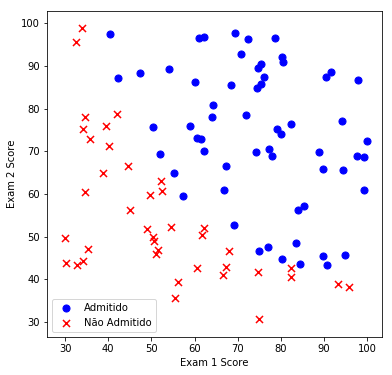

In [9]:
positive = df[df['Admitido'].isin([1])]  
negative = df[df['Admitido'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6)) 
ax.scatter(positive['Exame1'], positive['Exame2'], s=50, c='b', marker='o', label='Admitido')  
ax.scatter(negative['Exame1'], negative['Exame2'], s=50, c='r', marker='x', label='Não Admitido')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score')  

Podemos ver que há um limite de decisão quase linear. Ele se curva um pouco, então não podemos classificar todos os exemplos corretamente usando uma linha reta, mas devemos ser capazes de chegar bem perto. 

Agora, precisamos implementar a regressão logística para que possamos treinar um modelo para encontrar o limite de decisão ideal e fazer previsões de classe. O primeiro passo é implementar a função sigmóide.

### PRÉ-PROCESSAMENTO DE DADOS

### SEPARANDO X de y 

In [11]:
# set X (training data) and y (target variable)
n_features = len(df.columns)-1 

X = np.array(df.drop('Admitido',1)) 
y = df.iloc[:,n_features:n_features+1].values

### Guarando os vetores de média e desvio padrão na padronização para classificação futura

In [14]:
mean = X.mean(axis=0)
std = X.std(axis=0)

### Padronização dos dados

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
scaler.fit(X)
X = scaler.transform(X)

## CRIANDO X-zero com valores = 1

In [19]:
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X),axis=1)

## Criando um vetor de W's baseado na quantidades de features

In [20]:
w = np.random.rand(1,n_features+1) ## valores entre 0 e 1
w

array([[0.19637687, 0.59324904, 0.95199832]])

# SIGMOID

In [21]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z))

#### VISUALIZANDO UMA SIGMOID

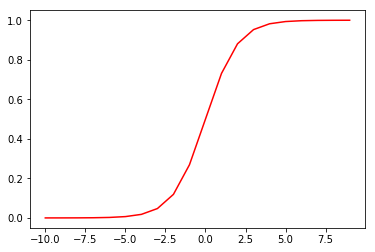

In [22]:
nums = np.arange(-10, 10, step=1) ## criando uma distribuição entre -10 e 10

## plotando 
fig, ax = plt.subplots(figsize=(6,4))  
ax.plot(nums, sigmoid(nums), 'r')  

## BINARY CROSS ENTROPY 

In [23]:
def binary_cross_entropy(w, X, y):    
    
    m = len(X)
    
    parte1 = np.multiply(-y, np.log(sigmoid(X @ w.T)))
    parte2 = np.multiply((1 - y), np.log(1 - sigmoid(X @ w.T)))
    
    somatorio = np.sum(parte1 - parte2)
    
    return  somatorio/m


## GRADIENT DESCENDENT

In [24]:
def gradient_descent(w,X,y,alpha,epoch):
    cost = np.zeros(epoch)
    for i in range(epoch):
        w = w - (alpha/len(X)) * np.sum((sigmoid(X @ w.T) - y)*X, axis=0)
        cost[i] = binary_cross_entropy(w, X, y)
    
    return w,cost

## INICIALIZANDO

In [25]:
X = insert_ones(X)

In [26]:
alpha=0.01 # taxa de aprendizado
epoch = 10000

In [27]:
w, cost = gradient_descent(w, X, y, alpha, epoch)

#### PLOTANDO O CUSTO

Text(0.5,1,'Erro vs. Epoch')

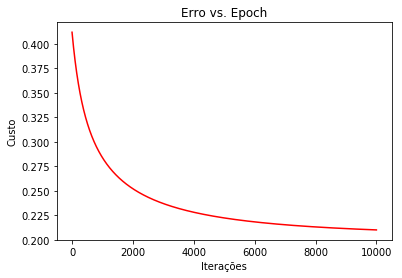

In [28]:
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), cost, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('Erro vs. Epoch')  

### VALORES FINAIS DE W

In [29]:
w

array([[1.28655889, 3.08048672, 2.84358495]])

## REALIZANDO PREDIÇÕES

In [33]:
def predict(w, X, threshold=0.5):
    p = sigmoid(X @ w.T) >= threshold
    return (p.astype('int'))









#### NOVO ESTUDANTE 1
Exame 1 = 45 <br/>
Exame 2 = 85

In [30]:
estudante1 = np.array([[45,85]])
estudante1 = (estudante1 - mean)/std
estudante1 = insert_ones(estudante1)

In [31]:
## PROBABILIDADE
sigmoid(estudante1@ w.T)

array([[0.7088435]])

In [34]:
## PREDIÇÃO
predict(w, estudante1)
## ADMITIDO

array([[1]])

#### NOVO ESTUDANTE 2
Exame 1 = 90 <br/>
Exame 2 = 90

In [35]:
estudante2 = np.array([[90, 90]])
estudante2 = (estudante2 - mean)/std
estudante2 = insert_ones(estudante2)

In [36]:
## PROBABILIDADE 
sigmoid(estudante2 @ w.T)

array([[0.99985208]])

In [37]:
## PREDIÇÃO
predict(w, estudante2)

array([[1]])

#### NOVO ESTUDANTE 3
Exame 1 = 45 <br/>
Exame 2 = 45

In [38]:
estudante3 = np.array([[45, 45]])
estudante3 = (estudante3 - mean)/std
estudante3 = insert_ones(estudante3)

In [39]:
## PROBABILIDADE 
sigmoid(estudante3 @ w.T)

array([[0.00515836]])

In [40]:
## PREDIÇÃO
predict(w, estudante3)
## NÃO ADMITIDO

array([[0]])

#### NOVO ESTUDANTE 4
Exame 1 = 62 <br/>
Exame 2 = 62

In [41]:
estudante4 = np.array([[62, 62]])
estudante4 = (estudante4 - mean)/std
estudante4 = insert_ones(estudante4)

In [42]:
## PROBABILIDADE 
sigmoid(estudante4 @ w.T)
## MUITO PRÓXIMO A 

array([[0.51434639]])